# PROJECT B: Car ownership over time for Copenhagen Metropolitan Area

### Social Data Analysis and Visualization 2021

#### Authors:  Berglind Lilja Björnsdóttir, Jón Ágúst Hannesson, and Aránzazu Fernández Romero













### 1. Motivation and brief description of the project 

The topic of sustainability and living an environmentally friendly lifestyle is constantly growing. Denmark is one of the frontrunners in implementing the United Nations Sustainable development goals and Copenhagen is a hub for innovation and development of sustainable solutions. In recent years there has been a shift in car ownership. People seem more and more switching from gasoline and diesel cars to more sustainable electric and hybrid cars. In this project we aim to verify and analyze this switch in car ownership for the Copenhagen Metropolitan Area and invite the user to dive into our visualization of this data. We look at and analyze car ownership in the period between 2006 and 2020. 

### 2. Basic stats. 

##### The datasets

We loaded and filtered the data from [København Statistikbank](https://kk.statistikbank.dk/statbank5a/default.asp?w=1536) and [Open Data DK](https://www.opendata.dk/). The raw data include tables on new private cars registered every year in every district in Copenhagen. The original raw data comes with unnecessary empty columns. For efficiency purposes, the data is filtered and cleaned separately in excel before being imported into this notebook. We use separate files for total (new) car ownership, car ownership by type, population in each district, salaries per district, and geodata. We work with 4 types of cars defined by fuel type: gasoline, diesel, electric and hybrid. Other types had insignificant representation and sat them to our default value. When we compare car ownership by district, we consider nr of cars per 100.000 people. This way we can compare trends between neighborhoods. For the salary data we choose annual salaries before taxes. This data appears already averaged for each neighborhood and year in the original source. When the data was not available for electric and hybrid cars we chose as default 0 value indicating there was not car registration of that type that year. The number in the first years of our period are very small and this approximation is quite appropiate. Finally, we implemented and hosted a website using Vue.js and GitHub Pages. 

To read the geodata is required to install Geopandas. All data can be found at this [link](https://github.com/jonagusth/socialData/tree/master/Final%20project/data).

##### Import libraries and data

In [138]:
import csv
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt 
import pandas as pd
import geopandas as gdp
import time

cars=pd.read_excel("Data/cars.xlsx")

gasoline=pd.read_excel("Data/gasoline.xlsx")
diesel=pd.read_excel("Data/diesel.xlsx")
el=pd.read_excel("Data/el.xlsx")
hybrid=pd.read_excel("Data/hybrid.xlsx")

people=pd.read_excel("Data/people.xlsx")
salaries=pd.read_excel("Data/salaries.xlsx")

geo=gdp.read_file('Data/neighborhood.shp')
geo['navn']=['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Vest','Vanløse','City centre', 'Amager Øst', 'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby']

##### Highligts from the exploratory data analysis

To better understand the car trends, we looked at the **number of car registrations**, **the population increase** and **a stacked barchart including the amount of cars per 100.000 peoples by car type**.

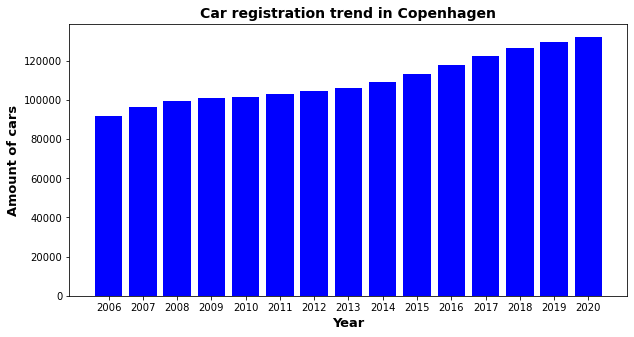

<Figure size 432x288 with 0 Axes>

In [139]:
years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']

barWidth = 0.60

cars=pd.read_excel("./data/cars.xlsx")
cars.head(3)

f, ax = plt.subplots(figsize=(10,5))

plt.xlabel('Year', fontweight='bold',fontsize=13)
plt.ylabel('Amount of cars', fontweight='bold',fontsize=13)
plt.title('Car registration trend in Copenhagen',fontweight='bold', fontsize=14)

fig = plt.figure()
ax.bar(years, cars['Copenhagen'], color='b')
plt.show()

#plt.savefig('Images/CopenBar.png')

The number of new cars has increased between 2006 and 2020. There are some years where the increase respect the previous year slows down, for instance 2009 and 2010, most likely due to world economic crisis. After 2013 the number of cars increases constantly.

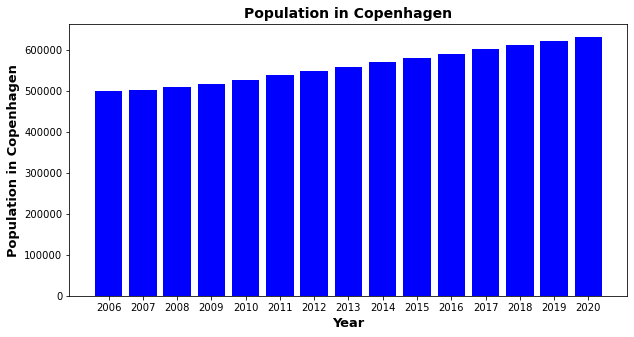

<Figure size 432x288 with 0 Axes>

In [140]:
f, ax = plt.subplots(figsize=(10,5))

plt.xlabel('Year', fontweight='bold',fontsize=13)
plt.ylabel('Population in Copenhagen', fontweight='bold',fontsize=13)
plt.title('Population in Copenhagen',fontweight='bold',fontsize=14)

fig = plt.figure()
ax.bar(years, people['Copenhagen'], color='b')
plt.show()
#plt.savefig('Images/PopulationCop.png')

When looking at the numbers for registered cars in the Copenhagen Metropolitan area it can be seen that the amount of registered cars is increasing. It can be seen that even though car registrations went up 30.6% from 2006 - 2020, the population for the same time period went up 20.7%. This explains some of the new car registration increase but not all. 

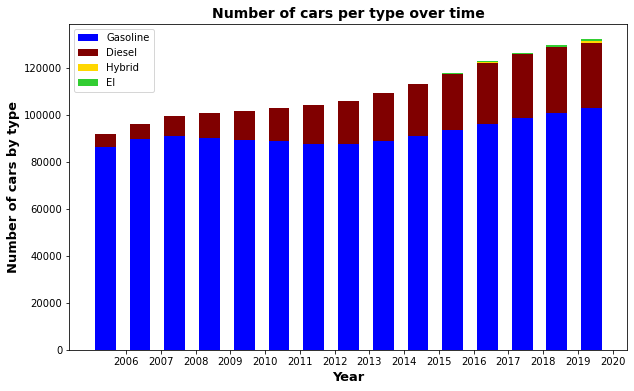

In [141]:
bar_gasoline = gasoline['Copenhagen']
bar_diesel = diesel['Copenhagen']
bar_el = el['Copenhagen']
bar_hybrid=hybrid['Copenhagen']
 
barWidth = 0.60

f, ax = plt.subplots(figsize=(10,6))

ax.bar(years, bar_gasoline , barWidth, color='b')
ax.bar(years, bar_diesel, barWidth ,bottom=bar_gasoline, color='maroon')
ax.bar(years, bar_hybrid, barWidth, bottom=bar_gasoline+bar_diesel, color='gold')
ax.bar(years, bar_el, barWidth, bottom=bar_gasoline+bar_diesel+bar_hybrid, color='limegreen')


plt.xlabel('Year', fontweight='bold', fontsize=13)
plt.ylabel('Number of cars by type', fontweight='bold', fontsize=13)
plt.xticks([r + barWidth for r in range(len(bar_gasoline))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
plt.title('Number of cars per type over time',fontweight='bold',fontsize=14) 
plt.legend(labels=['Gasoline', 'Diesel', 'Hybrid', 'El'])
plt.show()
#plt.savefig('Images/CarsTypeCopen.png')

**The stacked barchart of number of cars per 100.000 peoples by type** describes the car trends through the years including the type of cars: *gasoline, diesel, hybrid* and *electric cars*. This plot gives us an idea of how representative has been the number of electric and hybrid cars in Copenhagen in the past. This graph is very hard to read due to the huge difference in car registration by type. In this case, it is much more informative to look at the same data using logarithmic scales and to look at the percentage changes in a different type of cars between years. These graphs are implemented in the visualisation part of this notebook.

#### Car ownership over time in the Copenhagen Metropolitan Area**
    1.1. Car registration and population in Copenhagen between 2006-2020 
    1.2. Car ownership type over type stacked barchart
    1.3. Percentage change by type of car
    1.4. Logarithmic scale plots 
     
  
#### Car ownership type by district**
     
     2.1. Car ownership maps by district per 100000 people over time
     2.2. Car ownership by district barchart
     2.3. Anual salaries by district
     2.4. Car ownership vs salary by district 
     2.5  Regression lines and Pearsons correlation for car ownership vs salary 

#### Trends of electric and hybrid cars (*green cars*)**
 
     3.1. Scatter plots and regression line for green cars over time
     3.2. Evolution of green cars per 100.000 people every two years
     3.3. Green car district map


### 3. Data Analysis

The data analysis was split into three sections. 

**Car ownership over time in the Copenhagen Metropolitan Area** : This included car registration and population in Copenhagen, Car ownership by type of car, Annual changes in car registrations. 

**Car ownership by type and district**: This included car ownership maps by district, annual salaries by district, investigating the relationship between car ownership and salary for each district.

**Trends of electric and hybrid cars**: This included the evolution of green cars over time using maps, bar charts and a mixture of scatter and linear plots.


Our main findings included that the adoption of Electric and Hybrid cars is still in infancy in the Copenhagen municipality. In **2013** there was a big change in trend of **electric cars** with a rapid growth in the number of new cars per year. For **hybrid** cars that change was in **2018**. Registrations of green cars are increasing exponentially. This aligns with Denmark's tax changes, rewarding users of electric and hybrid cars and the cultural shift towards sustainability and living an environmentally friendly lifestyle. However the green cars are but they are still a drop in the ocean compared to benzine and diesel cars. The **suburb areas have most cars** in total: Valby, Vanløse and Brønshøj-Husum, while Vesterbro and Østerbro have the highest amount of cars. The **highest salaries** are in the **City centre, Osterbro, Amager Vest, Vestebro and Vanløse**. Most of the **green cars** are in the **City centre, Østerbro and Amager Vest**. All of these are high salary districts with only an average amount of cars. This means that **green cars** have been more popular among people with **higher salaries** despite of having less car per person. This can be explained by what can we could call the 'Tesla affect', the appearance of luxurious eclectic cars that are fast and elegant and much more expensive than other cars. We use Pearsons Correlation Coefficient and Linear Regression to verify this fact for every neighborhood.  


### 4. Genre. 
For the visual narritive of our project we used animated transistions/motion to lead the reader along. We also used feature distinction (bold typography) and a consistant visual platform to make navigation easier and highlight our main findings.

The ordering of the project is linear with very limited interactivity. The messaging uses Captions/Headlines, annotations, introductory text and summeries to project a clear message to the user.

We use a combination of a partitioned poster and a slideshow for our website. This includes plots, animated figures, and written text in three different pages. Each of the three pages acts as a slide in the displaying of our message. Each page is formatted as a partitioned poster, with text and chart intertwined


### 5. Visualizations.
The following visualizations are a natural continuation of the exploratory analysis described above. We have split the visualizations into the following sections.

#### Car ownership over time in the Copenhagen Metropolitan Area
    1.1. Percentage change by type of car
    1.2. Logarithmic scale plots 
     
  
#### Car ownership type by district
     
     2.1. Car ownership maps by district per 100000 people over time
     2.2. Car ownership by district barchart
     2.3. Anual salaries by district
     2.4. Car ownership vs salary by district 
     2.5  Regression lines and Pearsons correlation for car ownership vs salary 

#### Trends of electric and hybrid cars (*green cars*)
 
     3.1. Scatter plots and regression line for green cars over time
     3.2. Evolution of green cars per 100.000 people every two years
     3.3. Green car district map


### 5.1. Car ownership over time for Copenhagen Metropolitan Area

### 5.1.1. Percentage change by type of car

We saw in the exploratory analysis that the number of cars increased over the years in Copenhagen. Now let's have a look at the variation in percentage of the number of new registered cars respect the previous year for every type of car. Each car type is plotted in a separate bar. Negative bars indicate the number of new cars was lower than the previous year. The difference in the type of car gives us an idea of the trend of car ownership type of that year.

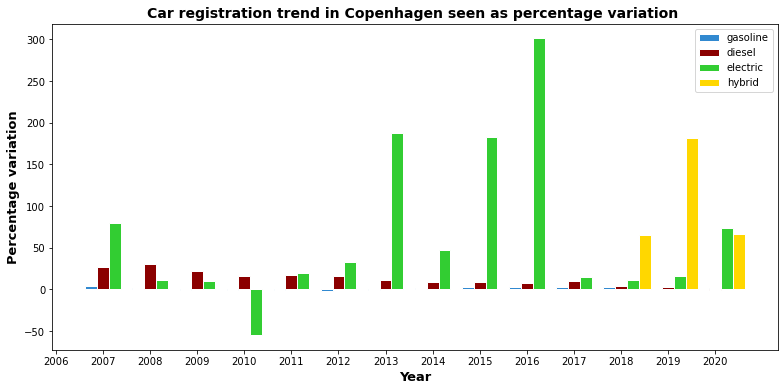

In [142]:
f, ax = plt.subplots(figsize=(13,6))
years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']

perc_gas=gasoline.Copenhagen.pct_change() * 100
perc_diesel=diesel.Copenhagen.pct_change() * 100
perc_hybrid=hybrid.Copenhagen.pct_change() * 100
perc_el=el.Copenhagen.pct_change() * 100

barWidth = 0.25 # width of bars
r1 = np.arange(len(perc_gas))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# PLOT BARCHART
plt.bar(r1, perc_gas, color='#3189D0', width=barWidth, edgecolor='white', label='gasoline')
plt.bar(r2, perc_diesel, color='darkred', width=barWidth, edgecolor='white', label='diesel')
plt.bar(r3, perc_el, color='limegreen', width=barWidth, edgecolor='white', label='electric')
plt.bar(r4, perc_hybrid,color='gold', width=barWidth, edgecolor='white', label='hybrid')

plt.xlabel('Year', fontweight='bold', fontsize=13)
plt.ylabel('Percentage variation', fontweight='bold',fontsize=13)
plt.xticks([r + barWidth for r in range(len(perc_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
plt.title('Car registration trend in Copenhagen seen as percentage variation ',fontweight='bold',fontsize=14)

plt.legend()
plt.show()

#plt.savefig('Images/PercVariation.png')

This plot informs us about crucial years for the electric and hybrid car industry in Copenhagen. In 2013 there was a big change in the trend of electric cars with a rapid growth in the number of new cars per year. For hybrid cars this change in trend occured in 2018. In contrast we see the number of diesel and gasoline cars is increasing slower than in previous years. 


### 5.1.2. Logarithmic scale plots

This plot describes the evolution of new cars registered in the Copenhagen Metropolitan Area by type of car from 2006 to 2020 using a logarithmic scale. The logarithmic scales allows us to see the trends by type of car even though the amount of diesel and bensin cars are way higher than the amount of hybrid and electric cars.  

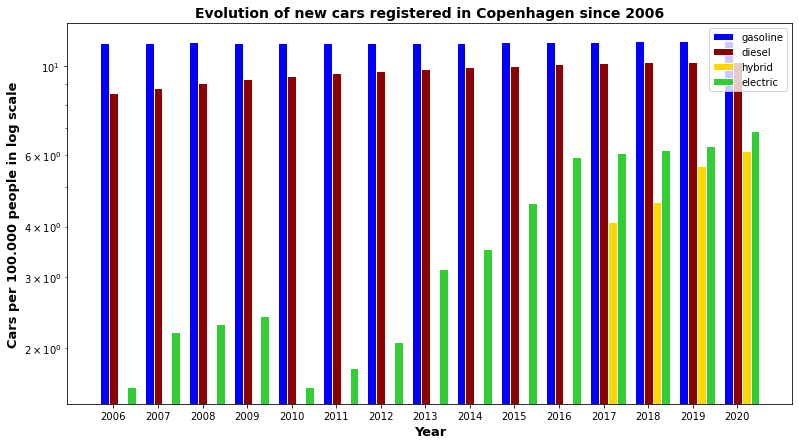

In [151]:
years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']

# set heights of bars
gas_log = np.log(gasoline['Copenhagen'])
diesel_log =  np.log(diesel['Copenhagen'])
el_log =  np.log(el['Copenhagen'])
hybrid_log= np.log(hybrid['Copenhagen'])
 
f, ax = plt.subplots(figsize=(13,7))

# Set position of bar on X axis

barWidth = 0.20 # width of bars
r1 = np.arange(len(gas_log))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# PLOT BARCHART
plt.bar(r1, gas_log, color='b', width=barWidth, edgecolor='white', label='gasoline')
plt.bar(r2, diesel_log, color='darkred', width=barWidth, edgecolor='white', label='diesel')
plt.bar(r3, hybrid_log ,color='gold', width=barWidth, edgecolor='white', label='hybrid')
plt.bar(r4, el_log, color='limegreen', width=barWidth, edgecolor='white', label='electric')

ax.set_yscale("log")
plt.xlabel('Year', fontweight='bold', fontsize=13)
plt.ylabel('Cars per 100.000 people in log scale', fontweight='bold',fontsize=13)
plt.xticks([r + barWidth for r in range(len(bar_gasoline))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
plt.title('Evolution of new cars registered in Copenhagen since 2006',fontweight='bold',fontsize=14)

plt.legend()
plt.show()

#plt.savefig('Images/CarTypeLogCop.png')

Now we can dive into trends by type of car. Gasoline car ownership had a small drop for new cars after the 2008 global crisis but began increasing again in 2013. The *Diesel* cars have more or less a *linear growth* over the whole time period but there is a clear change in 2019, exactly after the Danish parliament aproved the political proposal of reducing gasoline and diesel cars in the whole country. Both hybrid and electric cars seem to have exponential growth after 2016 as we will see in section 3.

There have been a lot of political changes in Denmark in the last few years regarding tax policies and car production. Danish regulations of taxing cars has drastically changed since 2013. Registration **tax extemptions of 105 - 180%** were introduced for **electric and hybrid cars**, and also green owner tax exemtions. This is remarcable considering that taxes over cars can be over 200% of the car price in Denmark. However, this is changing from 2021 where the tax on green cars is slowly in increasing respect previous years, but still remains lower than fossil fuel cars. On the other hand, **EV battery costs** have been **decreasing** worldwide since 2015. There have also been dramatic decreases of hardware costs for standard charging stations and car battery lifetimes have also improved. Another important change to note is that there has been an increase in number of electric and hybrid car manufactureres, for example Toyota and Seat, and more affordable electric and hybrid car models have also been introduced in the market.

## 5.2. Car ownership type by district

It can now be confirmed that the amount of electric and hybrid cars in Copenhagen has been rapidly increasing in the last 10 years or so but how are these cars distributed by areas? How do salaries and locations effect electric and hybrid car ownership? To be able to compare car data between districts, we analyze the number of cars per 100,000 people in each district. First we prepare the new tables, then we plot the evolution of the number of cars per district in maps. 

### 5.2.1. Maps of car ownership by district over the years

In [144]:
cars_100=cars.div(people)*100000
cars_100['Year']=cars['Year']
cars_100=round(cars_100, 2)
#cars_100.to_csv('Data/cars_100.csv', index=False)
cars_100.head(3)

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,18297.69,20723.34,19299.05,13295.00,14109.62,20606.10,23744.33,22550.38,16946.03,18414.65,18777.15
1,2007,19112.18,21541.61,20115.51,13905.79,15351.41,21615.64,24711.44,23416.28,17363.61,19226.88,19536.68
2,2008,19535.48,21875.75,20657.90,14178.33,16079.47,22093.92,25060.60,23800.10,17857.14,19677.93,20032.23


In [145]:
gasoline_100=gasoline.div(people)*100000
gasoline_100['Year']=cars['Year']
gasoline_100=round(gasoline_100, 2)
#gasoline_100.to_csv('Data/gasoline_100.csv', index=False)
gasoline_100.head(3)

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,17250.98,19391.11,18261.44,12433.17,13189.13,19443.90,22530.15,21420.46,16096.83,17297.87,17706.64
1,2007,17794.67,19842.41,18805.96,12893.59,14221.25,20115.91,23165.93,21875.63,16331.37,17899.82,18116.18
2,2008,17844.20,19742.92,18933.71,12960.01,14564.56,20160.56,23018.42,21864.54,16512.20,17969.39,18199.87


In [146]:
diesel_100=diesel.div(people)*100000
diesel_100['Year']=cars['Year']
diesel_100=round(diesel_100, 2)
#diesel_100.to_csv('Data/diesel_100.csv', index=False)
diesel_100.head(3)

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,1045.71,1327.76,1037.62,861.83,920.50,1162.20,1214.18,1129.92,846.97,1114.73,1068.45
1,2007,1315.33,1694.80,1306.59,1009.39,1130.17,1499.73,1545.51,1538.11,1030.04,1325.00,1416.58
2,2008,1689.13,2124.07,1724.19,1215.53,1514.92,1933.36,2042.18,1933.03,1344.94,1704.45,1828.61


In [147]:
el_100=el.div(people)*100000
el_100['Year']=cars['Year']
el_100=round(el_100, 2)
#el_100.to_csv('Data/el_100.csv', index=False)
el_100.head(3)

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007,1.79,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,1.96,8.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
hybrid_100=hybrid.div(people)*100000
hybrid_100['Year']=cars['Year']
hybrid_100=round(hybrid_100, 2)
#hybrid_100.to_csv('Data/hybrid_100.csv', index=False)
hybrid_100.head(3)

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This plot shows the evolution of car ownership (new cars) by district in Copenhagen Metropolitan Area. The districts include City Centre, Østerbro, Nørrebro, Vesterbro/Kongens Enhave, Valby, Vanløse, Brønshøj-Husum, Bispebjerg, Amager Øst and Amager Vest. 

To build the table we merged car data with geodata that includes geografical information for every district (Geopandas must be installed to run this cell).

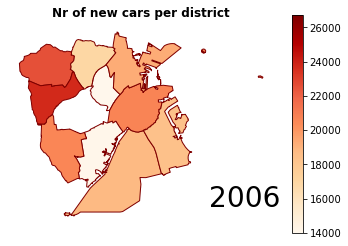

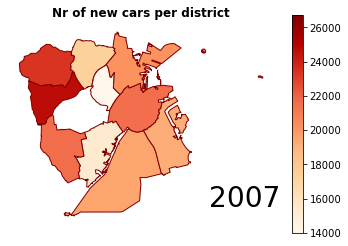

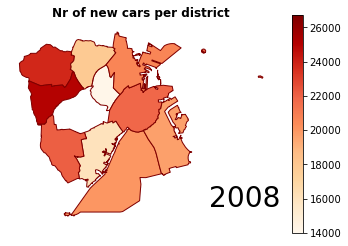

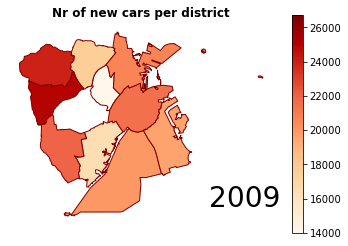

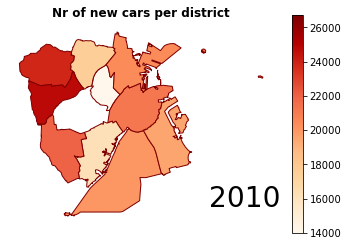

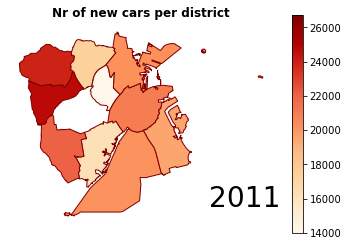

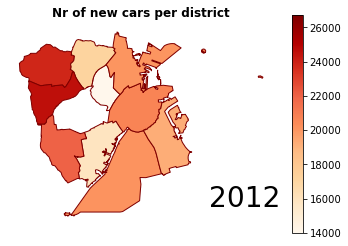

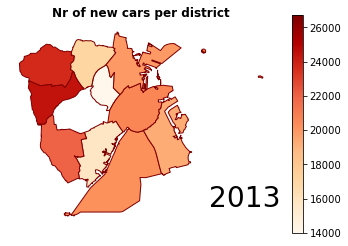

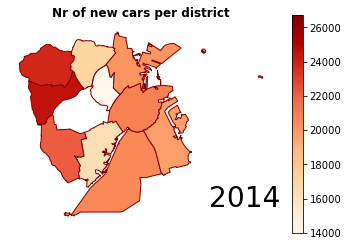

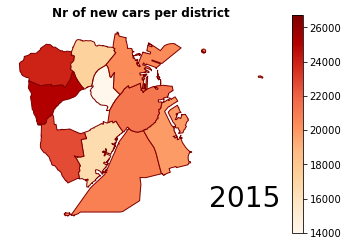

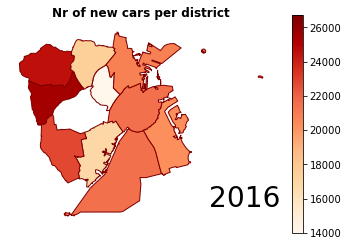

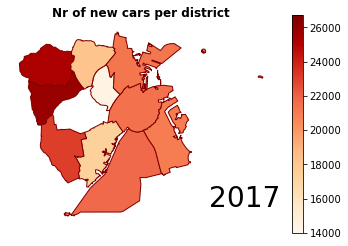

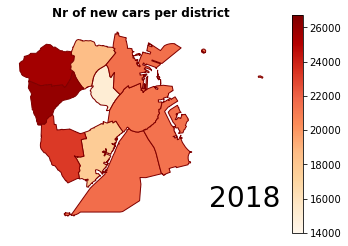

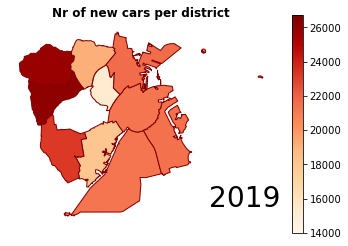

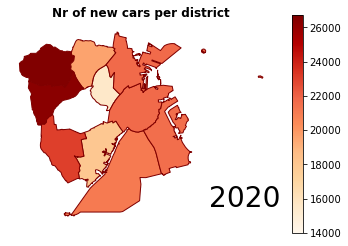

In [152]:
years=([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
people=pd.read_excel("Data/people.xlsx")

j=0

for i in years:
    cars=pd.read_excel("Data/cars.xlsx")
    cars_100=(cars/people)*100000
    cars_100['Year']=([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

    cars__=cars_100[cars_100['Year']==i]
    cars__=cars__.T
    cars__['cars']=cars__[j]
    cars__=pd.DataFrame(data=cars__['cars'])
    cars__=cars__.drop(['Year'])

    # Turn index into column so we can merge
    cars__['navn'] = cars__.index

    geo=gdp.read_file('Data/neighborhood.shp')
    geo['navn']=(['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Vest','Vanløse','City centre', 'Amager Øst', 'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby'])
    
    geo_cars__=geo.merge(cars__, on = ['navn'], how='inner')[['navn','cars','geometry']]
    
    geo_cars__.plot(column='cars', cmap='OrRd', edgecolor = "maroon", legend=True, vmin = 14000, vmax=26700)
    plt.title('Nr of new cars per district',fontweight='bold') 
    plt.xlabel('Longitude',fontweight='bold')
    plt.ylabel('Latitude',fontweight='bold')
    plt.annotate(i, xy=(0.6, .25), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=28)
    plt.axis('off')
    #plt.savefig('CopenhagenMap'+str(i)+'.png')
    plt.show()
   
    j=j+1


Here we can see that the number of cars over the years has increased in all districts since 2006, in bigger proportion in the north west part of the city at all times, this is Vanløse and Brønshøj. We compiled the maps in a animated gif file for the website with GifMaker.

### 5.2.2. Car ownership by district barchart

In [153]:
def car_neighborhood(i):
    years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']

    gas_log = np.log(gasoline_100[i])
    diesel_log =  np.log(diesel_100[i])
    el_log =  np.log(el_100[i])
    hybrid_log= np.log(hybrid_100[i])
 
    f, ax = plt.subplots(figsize=(12,6))

    barWidth = 0.2 # width of bars
    r1 = np.arange(len(gas_log))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    # PLOT BARCHART
    plt.bar(r1, gas_log, color='b', width=barWidth, edgecolor='white', label='gasoline')
    plt.bar(r2, diesel_log, color='darkred', width=barWidth, edgecolor='white', label='diesel')
    plt.bar(r3, hybrid_log ,color='orange', width=barWidth, edgecolor='white', label='hybrid')
    plt.bar(r4, el_log, color='limegreen', width=barWidth, edgecolor='white', label='electric')
    
    ax.set_yscale("log")
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Cars per 100.000 people', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bar_gasoline))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
    plt.title(i,fontweight='bold', fontsize=14)

    ax.legend( bbox_to_anchor=(1, 0.7))
    plt.show()
    #plt.savefig('Images/CarsType'+str(i)+'.png')

/Users/arancha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


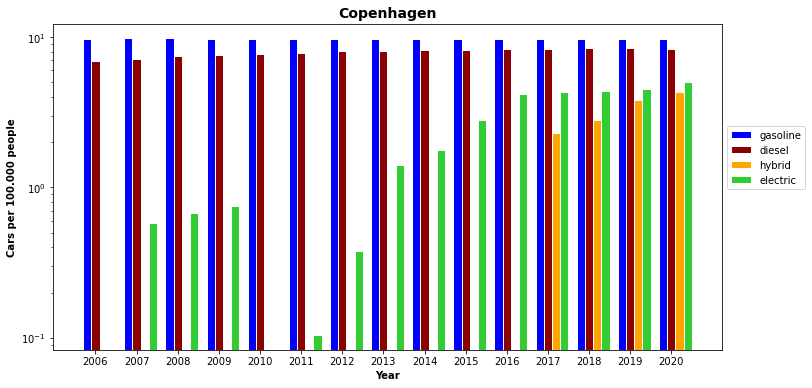

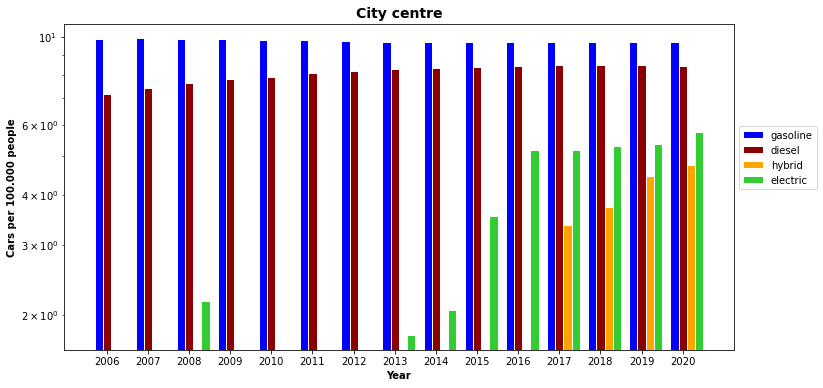

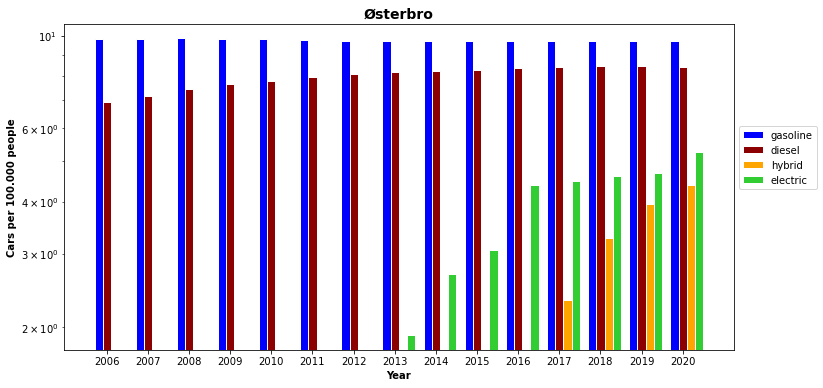

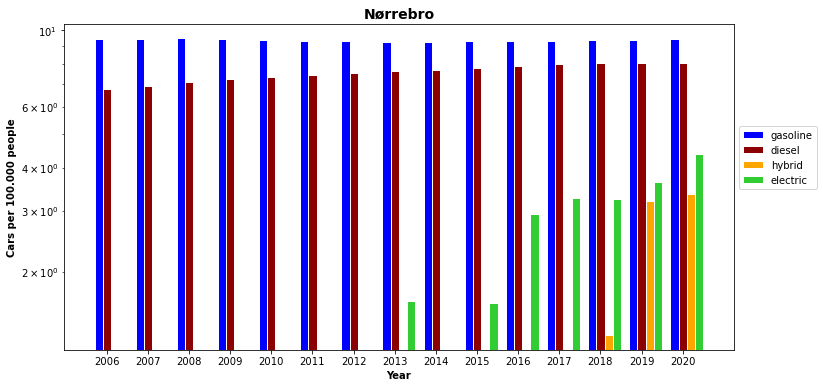

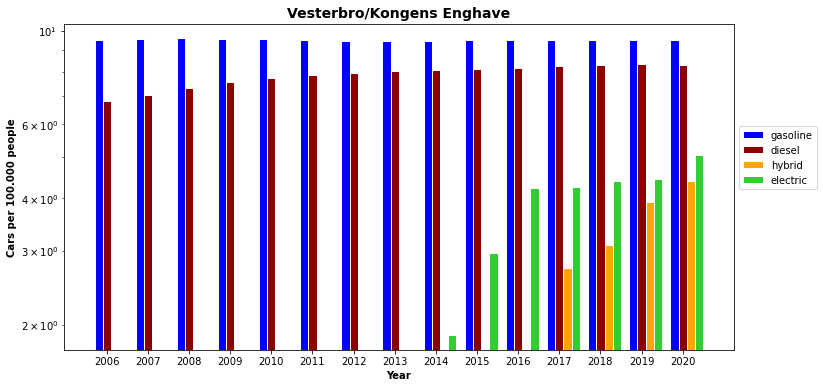

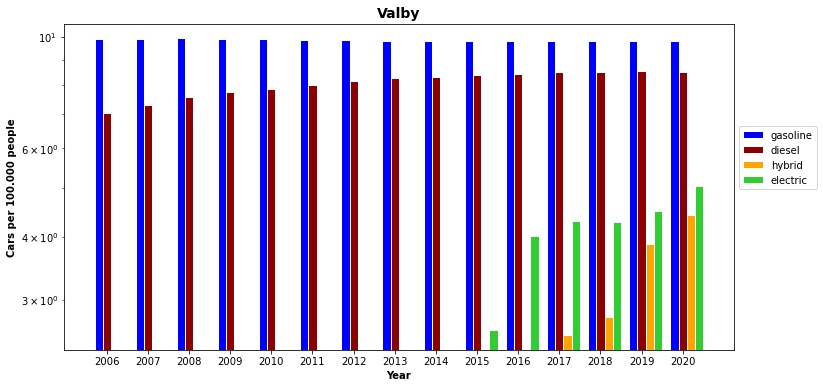

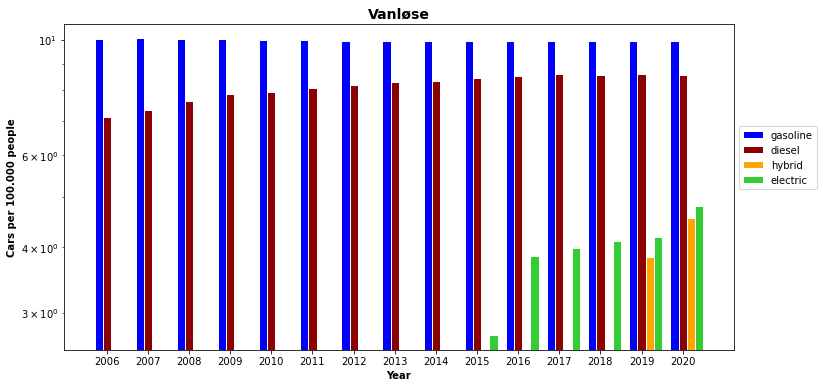

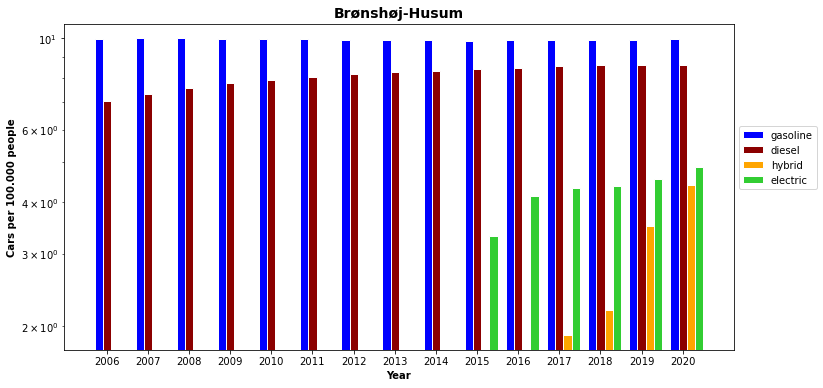

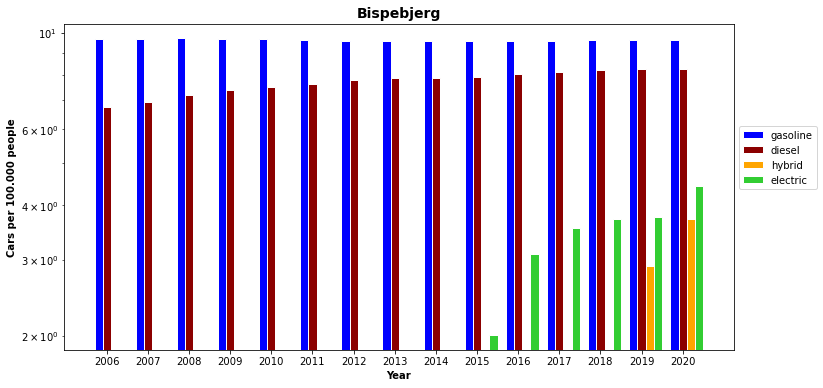

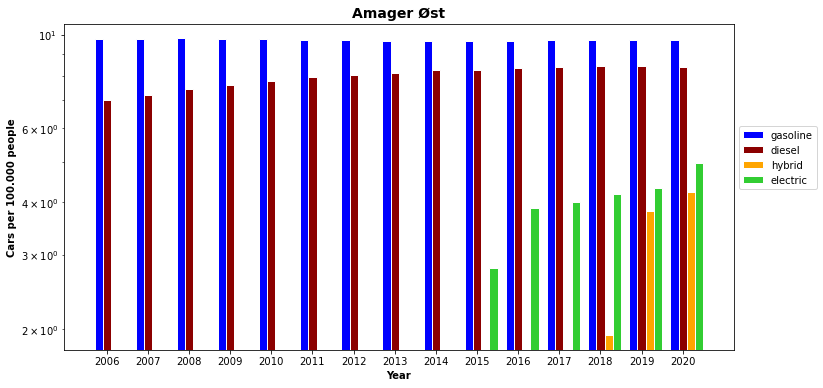

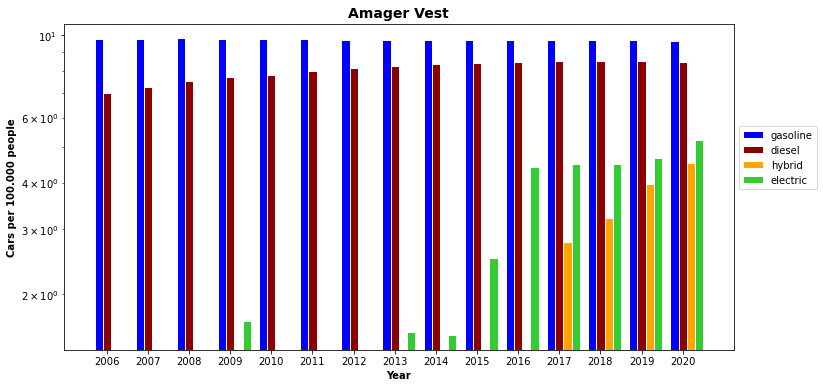

In [154]:
neighborhoods=(['Copenhagen', 'City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'])

for i in neighborhoods:
    car_neighborhood(i)

Electric cars started appearing in 2008/2009 in the City Center and Amager vest. Nørrebro and Østerbro joined the list in 2013 and  Vesterbro/Kongens Enghavein 2014. Electric then started appearing in the other districts in 2015.

Hybrid cars started appearing in 2017 in many of the districts. However they didn't start appearing in Bispebjerg and Vanløse until 2019. We saw that the total number of cars in Vanløse was one of the highest per person, but this chart shows the opposite for the specific case of hybrid cars. We suspect that this difference might be related to salaries, so let's have a look at annual salaries per person by district.

### 5.2.3. Anual salaries by district

The following plot shows the average annual salaries (pre-tax) by district over time. This data is given for  people who is eligible for work.

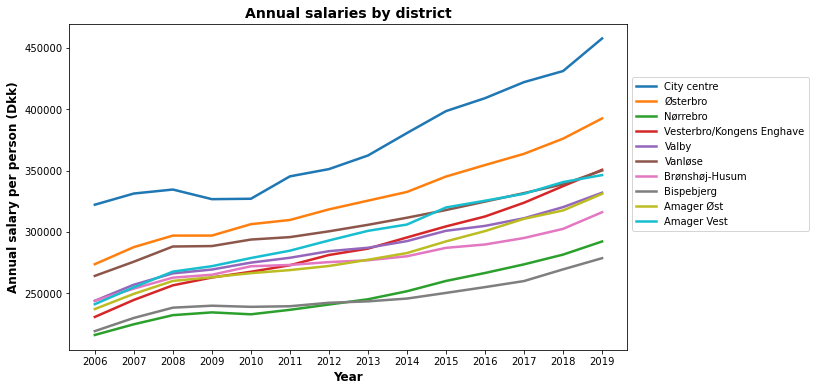

In [155]:
year = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019']
neighborhoods=([ 'City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'])

plt.figure(figsize=(10,6))
ax = plt.subplot(111)

for i in neighborhoods:
    line, = ax.plot(year, salaries[i], label=i, linewidth=2.5)    

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.6))
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Annual salary per person (Dkk)',fontweight='bold', fontsize=12)
plt.title('Annual salaries by district',fontweight='bold', fontsize=14)
plt.show()
#plt.savefig('Images/AnnualSalary.png')

The City Centre and Østerbro are the wealthiest districts whereas Nørrebro and Bispebjerg have the lowest average salary. There is a high contrast between some neighborhoods such as the City Centre and Nørrebro.

### 5.2.4. Car ownership vs salary by district

The following scatter plot shows the average number of cars registered per 100000 people by district over the years versus the average annual salary. Each dot represents the number of cars per 100000 people for the average salary of those people in one year.

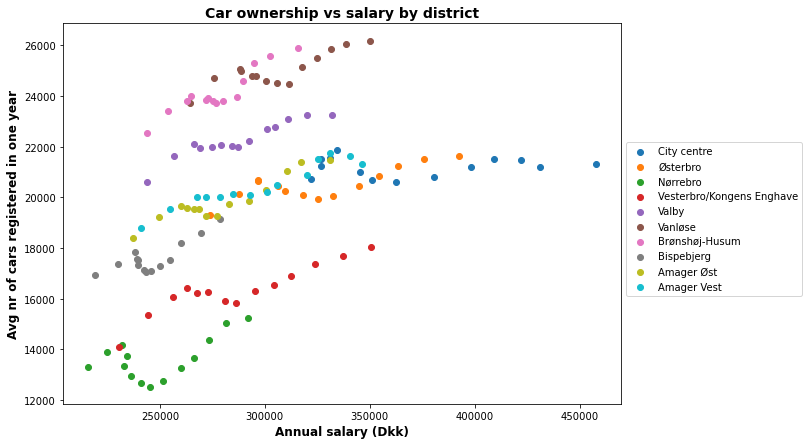

In [156]:
cars=pd.read_excel("Data/cars.xlsx")
cars=cars.div(people)*100000
cars=cars.drop([14])
carsT=cars.T #transpose table
carsT=carsT.reset_index()
carsT=carsT.drop([0])

salaries=pd.read_excel("Data/salaries.xlsx")
salariesT=salaries.T
salariesT = salariesT.reset_index()
salariesT=salariesT.drop([0])

neighborhoods=np.array(['City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'])

plt.figure(figsize=(10,7))

for i in neighborhoods:
    cars_i=carsT[carsT['index']==i]
    cars_i=cars_i.drop(['index'], axis=1)
    salaries_i=salariesT[salariesT['index']==i]
    salaries_i=salaries_i.drop(['index'], axis=1)
    plt.scatter(salaries_i,cars_i)

plt.legend(neighborhoods, bbox_to_anchor=(1, 0.7))
plt.xlabel('Annual salary (Dkk)',fontweight='bold', fontsize=12)
plt.ylabel('Avg nr of cars registered in one year',fontweight='bold', fontsize=12)
plt.title('Car ownership vs salary by district', fontweight='bold', fontsize=14)    
plt.show()

#plt.savefig('Images/CarNeighborhood.png')

### 5.2.5 Regression lines and Pearsons correlation for car ownership vs salary by district

The following scatter plot shows the average number of cars registered per 100000 people over the years versus the average annual salary for every district. A linear regresion line has been added together with the Pearsons Correlation Coefficient that looks for linear relationship.

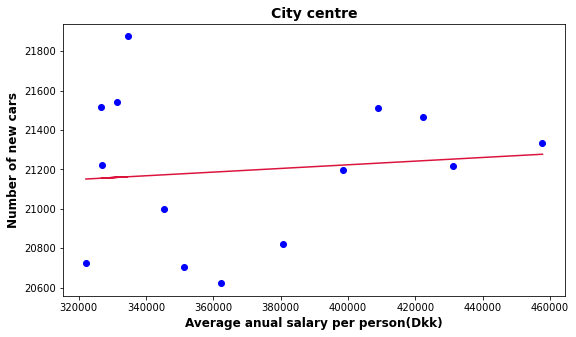

Pearsons correlation coefitient =  0.11068662970169608


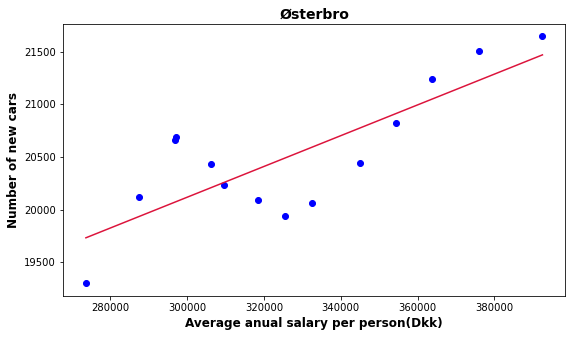

Pearsons correlation coefitient =  0.8002816994204216


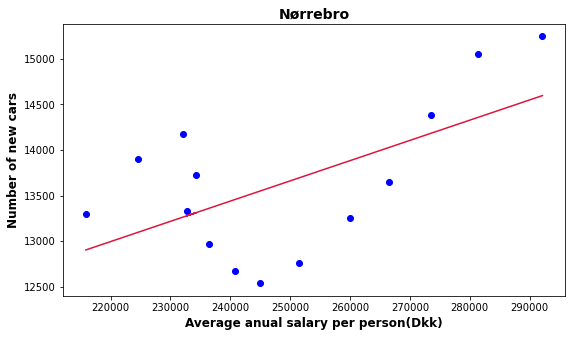

Pearsons correlation coefitient =  0.5952400146130605


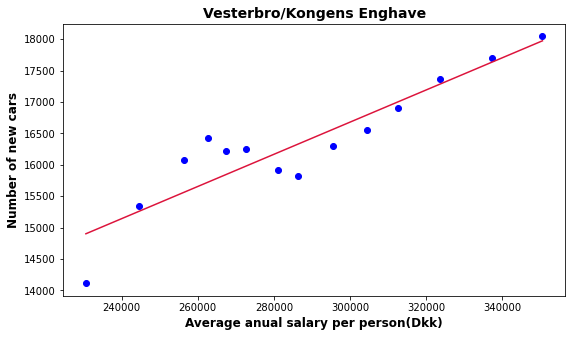

Pearsons correlation coefitient =  0.9134145171241967


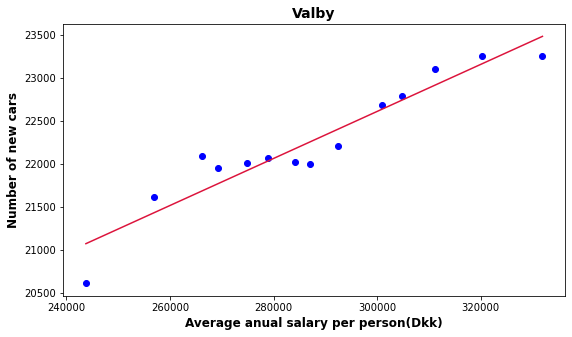

Pearsons correlation coefitient =  0.9470830367647493


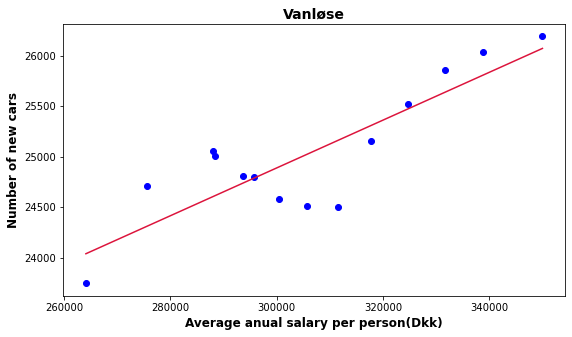

Pearsons correlation coefitient =  0.85795113539026


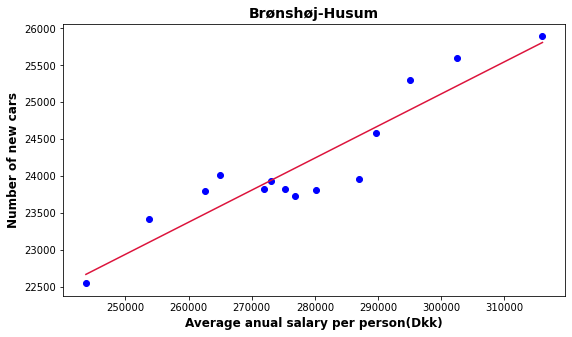

Pearsons correlation coefitient =  0.9287111067068379


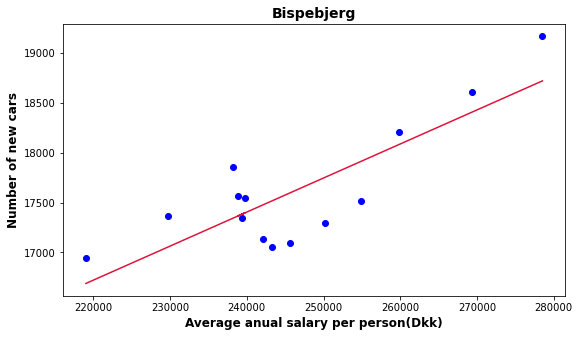

Pearsons correlation coefitient =  0.824895722102232


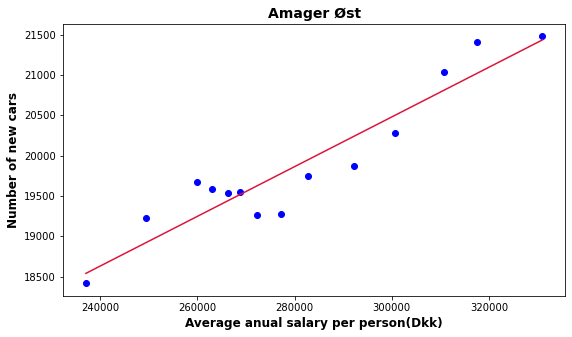

Pearsons correlation coefitient =  0.9397304399929254


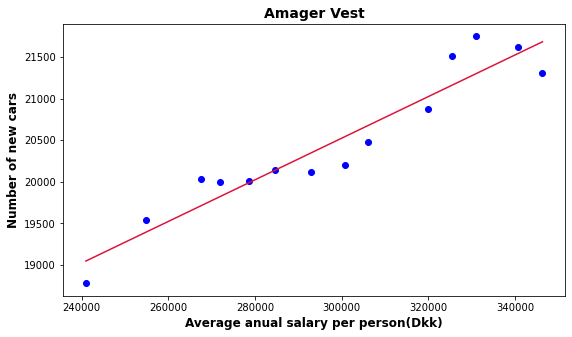

Pearsons correlation coefitient =  0.9504485330306699


In [157]:
salaries=pd.read_excel("Data/salaries.xlsx")
cars=pd.read_excel("Data/cars.xlsx")
cars_=(cars/people)*100000
cars_03_19=cars_.drop([14])


for i in neighborhoods:
    x=salaries[i]
    y=(cars_03_19[i])
    plt.figure(figsize=(9,5))
    plt.scatter(x,y, color='b')
    plt.xlabel('Average anual salary per person(Dkk)', fontweight='bold',fontsize=12)
    plt.ylabel('Number of new cars', fontweight='bold',fontsize=12 )
    plt.title(i, fontsize=14, fontweight='bold')


    # linear regresion line
    N=len(x)  
    x_mean=(1/N)*(sum(x))
    y_mean=(1/N)*(sum(y))
    a=(sum(x*y)-(N*x_mean*y_mean))/(sum(x**2)-N*(x_mean**2))
    b=y_mean-a*x_mean
    #plot with regression line
    plt.plot(x, a*x + b, color="crimson")
    plt.show() 
    
    from scipy.stats import pearsonr
    R= pearsonr(x,y)
    print('Pearsons correlation coefitient = ', R[0])
    
    #plt.savefig('Images/PearsonLines/Correlation'+str(i)+'.png')

**Valby, Verterbro, Brønshøj-Husum and Amager** show the **highest Pearsons Correlation Coefficient** (near to 1) indicating a *strong linear relationship* between car ownership and salary. In the **City Centre and Nørrebro** however the salary is *not linearly related* to the average number of cars per person.

## 5.3. Trends of electric and hybrid cars

Now we are going to shift the focus to look at the evolution of electric and hybrid cars, popularly known as green cars.

### 5.3.1. Scatter plots and regression line for green cars

The scatter plots show the total number of cars per year in Copenhagen Metropolitan Area for hybrid and electric cars.

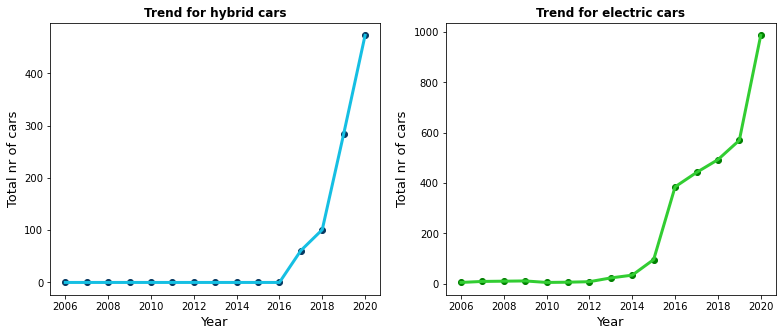

In [158]:
data_x=[hybrid['Year'],el['Year']]
data_y=[hybrid['Copenhagen'], el['Copenhagen']] 
np.dataString=['hybrid','el']                
  
    
fig, ax = plt.subplots(1, 2, figsize=(13,5))

ax[0].plot(hybrid['Year'],hybrid['Copenhagen'], 'o', color='#083961');
ax[0].plot(hybrid['Year'],hybrid['Copenhagen'], '-', color='#15BFE3', linewidth=3.0)
ax[1].plot(el['Year'],el['Copenhagen'], 'o', color='green');
ax[1].plot(el['Year'],el['Copenhagen'], '-', color='limegreen', linewidth=3.0);
ax[0].title.set_text('Trend for hybrid cars')
ax[1].title.set_text('Trend for electric cars')
plt.setp(ax[0], xlabel='Year')
plt.setp(ax[1], xlabel='Year')
plt.setp(ax[0], ylabel='Total nr of cars')
plt.setp(ax[1], ylabel='Total nr of cars')
ax[0].xaxis.get_label().set_fontsize(13)
ax[1].xaxis.get_label().set_fontsize(13)
ax[0].yaxis.get_label().set_fontsize(13)
ax[1].yaxis.get_label().set_fontsize(13)
ax[0].title.set_fontweight('bold')
ax[1].title.set_fontweight('bold')

plt.show()

The scatter plot shows what it seems an exponential growth in both types of car. The number of electric cars have been growing since 2013, whereas hybrid cars are growing faster since 2016. Lets have a look now at the growth of this numbers by district every two years.

## 5.3.2. Evolution of the number of green cars per 100,000 people every two years
The bar chart describes the evolution of green cars per district.

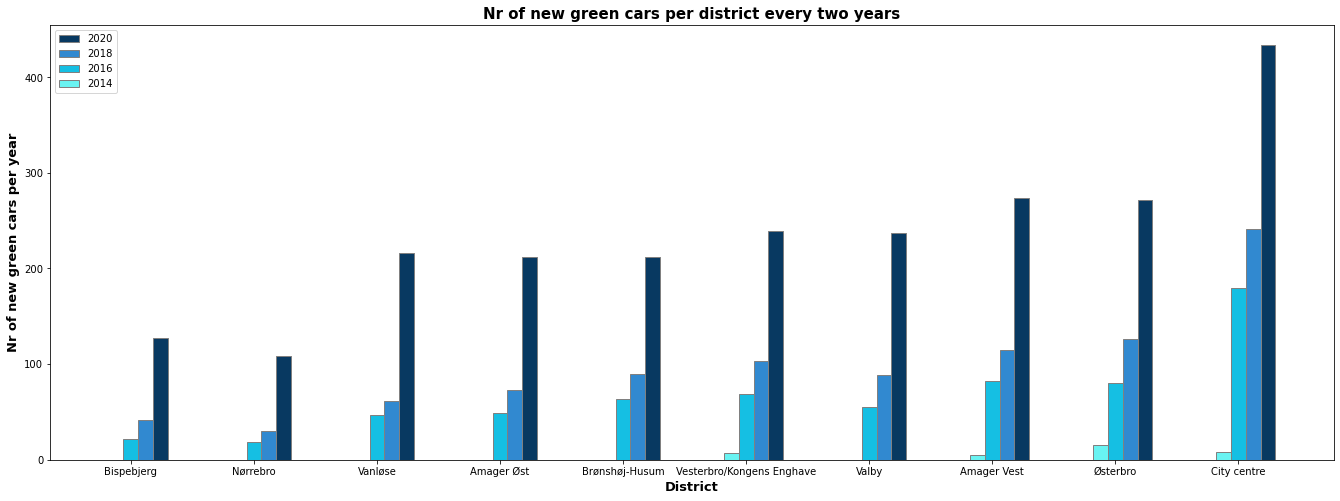

In [159]:
el=pd.read_excel("Data/el.xlsx")
el_100=(el/people)*100000
el_=el_100.T
el_=el_.reset_index()
el_=el_.drop([0,1])

hybrid=pd.read_excel("Data/hybrid.xlsx")
hybrid_100=(hybrid/people)*100000
hybrid_=hybrid_100.T
hybrid_=hybrid_.reset_index()
hybrid_=hybrid_.drop([0,1])

combined=el_+hybrid_
combined['index']=(['City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'])
combined=combined.sort_values(by=[13], ascending=True) 

f1, ax = plt.subplots(figsize=(23,8))

# Set position of bar on X axis

barWidth = 0.12 # width of bars
r1 = np.arange(len(combined))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r4,combined[14], color='#083961', width=barWidth, edgecolor='grey', label='2020')
plt.bar(r3,combined[12], color='#3189D0', width=barWidth, edgecolor='grey', label='2018')
plt.bar(r2,combined[10], color='#15BFE3', width=barWidth, edgecolor='grey', label='2016')
plt.bar(r1,combined[8], color='#69F3F2', width=barWidth, edgecolor='grey', label='2014')

# Add xticks on the middle of the group bars
plt.xlabel('District', fontweight='bold',fontsize=13)
plt.ylabel('Nr of new green cars per year', fontweight='bold', fontsize=13)
plt.xticks([r + barWidth for r in range(len(neighborhoods))], combined['index'])
plt.title('Nr of new green cars per district every two years', fontsize=15, fontweight='bold')

plt.legend()
plt.show()

Earlier it was highlighted that there are *more cars per person in the suburbs*, this is Vanløse, Brønshøj-Husum and Valby. However there are clearly **more green cars** in the **city center**. This could well be because of what we can call the 'Tesla effect', the appearance of luxurious electric cars that are fast and elegant and much more expensive than other cars. Another reason could be the higher accessibility of charging stations in the city. It is clear that the amount of green cars is increasing exponentially in all areas which is a good sign for the future. 

## 5.3.3. Maps for green cars per year by district

This plot shows the evolution of car ownership by district over the years. The fisrt maps show that there were almost no green cars in the early years. Since 2015 we can see a gradual increase of green cars in most districts, specially in the city centre. 

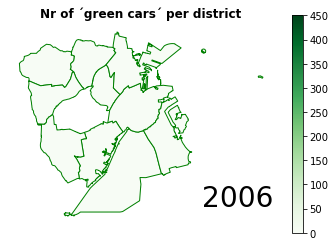

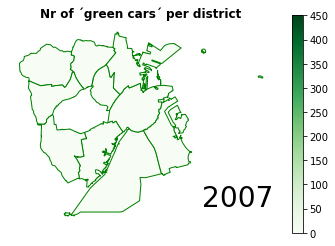

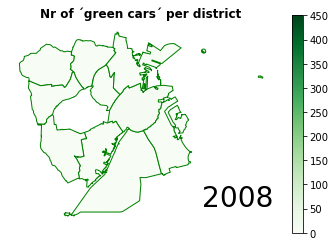

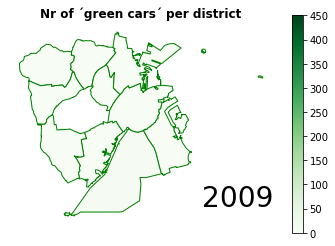

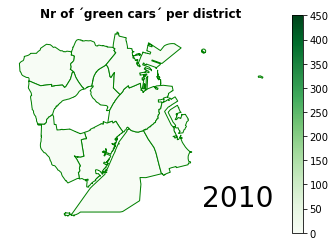

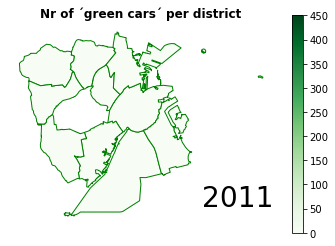

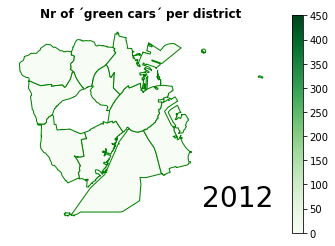

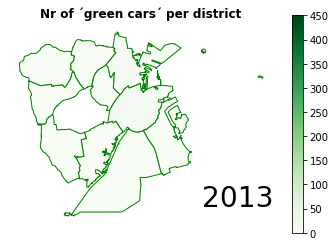

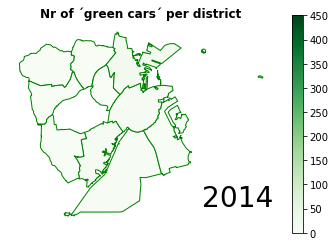

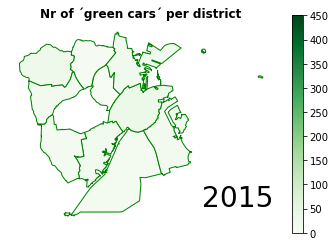

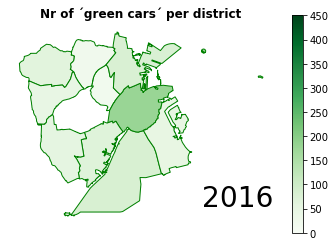

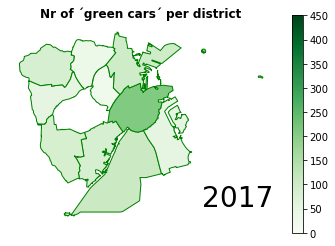

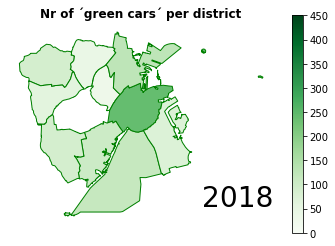

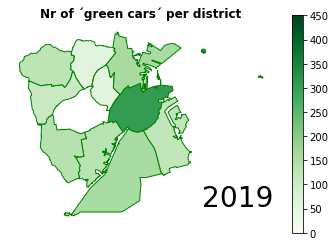

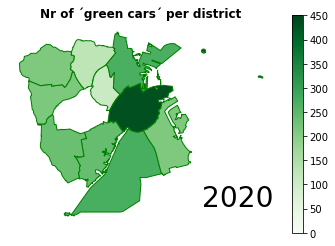

In [160]:
import time

years=([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
people=pd.read_excel("Data/people.xlsx")

j=0

for i in years:
    el=pd.read_excel("Data/el.xlsx")
    hybrid=pd.read_excel("Data/hybrid.xlsx")
    el_=(el/people)*100000
    hybrid_=(hybrid/people)*100000
    greencars_=el_+hybrid_
    greencars_['Year']=([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

    greencars_=greencars_[greencars_['Year']==i]
    greencars_=greencars_.T
    greencars_['cars']=greencars_[j]
    greencars_=pd.DataFrame(data=greencars_['cars'])
    greencars_=greencars_.drop(['Year'])

    # Turn index into column so we can merge
    greencars_['navn'] = greencars_.index

    geo=gdp.read_file('Data/neighborhood.shp')
    geo['navn']=(['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Vest','Vanløse','City centre', 'Amager Øst', 'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby'])

    geo_greencars=geo.merge(greencars_, on = ['navn'], how='inner')[['navn','cars','geometry']]

    geo_greencars.plot(column='cars', cmap='Greens', edgecolor = "green",  legend=True, vmin = 0, vmax=450 )
    plt.title('Nr of ´green cars´ per district',fontweight='bold') 
    plt.xlabel('Longitude',fontweight='bold')
    plt.ylabel('Latitude',fontweight='bold')
    plt.annotate(i, xy=(0.6, .25), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=28)
    plt.axis('off')
    plt.show()
    j=j+1

### 6. Discussion. 

Groupwork in an all online course had it's challenges but with the help of zoom and slack we managed to work well as a team. It took the group a while to figure out the narrative of the project, it was a challenge to narrow down which direction we wanted to take since there are so many different options in data visualization. Through trial and error the team managed to figure out which visualizations fit the dataset best. The development of the website went pretty well, there were no major obsticles and we are satisfied with our results.

In the future it could be interesting to include information on car prices over time and analyze information on ages and family types per neighborhood. Looking back we might have wanted to choose richer datasets which would enable us to explore the data through machine learning. 

### 7. Contributions

**The project was sectioned into three parts:**
- Part 1. Car ownership over time for Copenhagen Metropolitan Area
- Part 2. Car ownership and salaries by district
- Part 3. Green car trends

Each member contributed to all sections of the project but the following lists the main responsibilities of group members.

**Berglind Lilja Björnsdóttir:**
- Visualization: Part 1
- Analysis: Part 1
- Web Development: Part 2.  

**Jón Ágúst Hannesson:**
- Analysis: for Part 2. 
- Web Development: Part 1 and Part 3, website hosting and deployment, website styling

**Aranzazu Fernandez Romero**
- Visualization: Part 2 and 3
- Analysis: Part 3